<a href="https://colab.research.google.com/github/ryt98/Python/blob/Master/GrpD_Sec1_Lab4_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [43]:
# importing libraries
import pandas as pd # Data processing signle & two dimension
import scipy # Data processing scientific & mathematical
import numpy as np # Data processing multidimension
from sklearn.preprocessing import MinMaxScaler # Supervised & unsupervised ML
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
import warnings as wr # Show data warning
wr.filterwarnings('ignore')

In [44]:
# Load the dataset from GDrive path
df = pd.read_csv('/content/drive/MyDrive/1_UTM/YEAR 4 SEM 1/SEBB 4712 LABORATORY 4/MODULE 2 (SUPERVISED MACHINE LEARNING)/Pima-Indians-Diabetes-Database.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Check Database

In [45]:
# Check dataset shape
df.shape

(768, 9)

In [46]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
# Describing dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
# Check dataset column
# column to list
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [49]:
# Check dataset null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
# Check dataset duplicated value
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Check Dataset Outliners

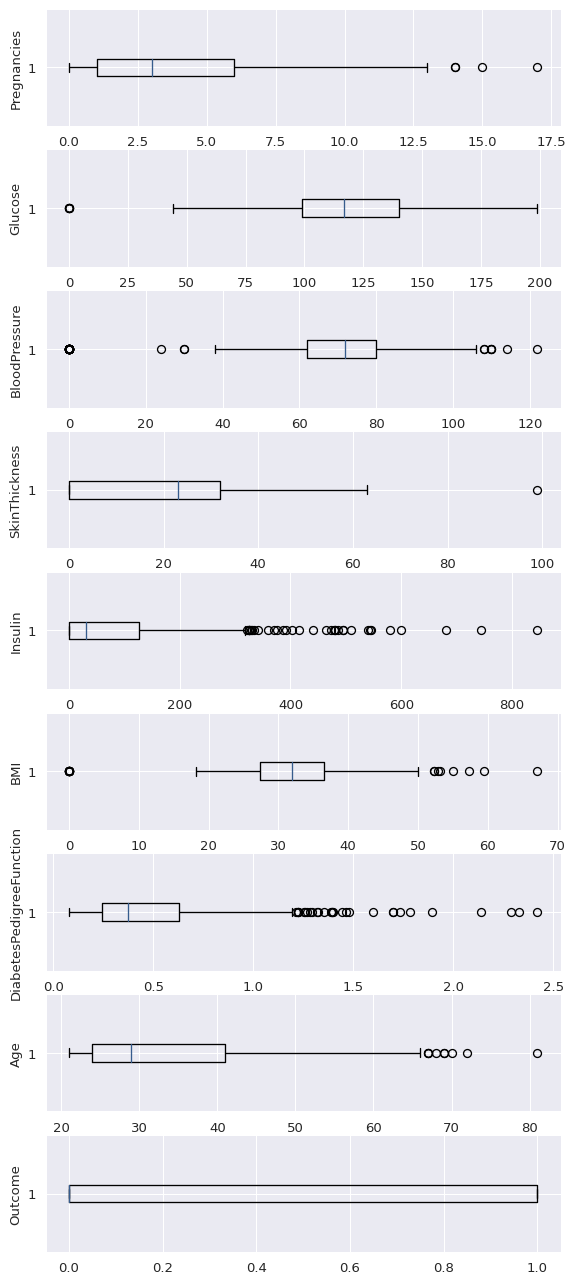

In [51]:
# Check dataset outliers
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [52]:
# Drop dataset outliers
# Identify the quartiles_Insulin
q1, q3 = np.percentile(df['Insulin'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['Insulin'] >= lower_bound)
                & (df['Insulin'] <= upper_bound)]

# Identify the quartiles_Pregnancies
q1, q3 = np.percentile(clean_data['Pregnancies'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Pregnancies'] >= lower_bound)
                        & (clean_data['Pregnancies'] <= upper_bound)]

# Identify the quartiles_Age
q1, q3 = np.percentile(clean_data['Age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Age'] >= lower_bound)
                        & (clean_data['Age'] <= upper_bound)]

# Identify the quartiles_Glucose
q1, q3 = np.percentile(clean_data['Glucose'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Glucose'] >= lower_bound)
                        & (clean_data['Glucose'] <= upper_bound)]

# Identify the quartiles_Blood Pressure
q1, q3 = np.percentile(clean_data['BloodPressure'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BloodPressure'] >= lower_bound)
                        & (clean_data['BloodPressure'] <= upper_bound)]

# Identify the quartiles_BMI
q1, q3 = np.percentile(clean_data['BMI'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BMI'] >= lower_bound)
                        & (clean_data['BMI'] <= upper_bound)]

# Identify the quartiles_Diabetes
q1, q3 = np.percentile(clean_data['DiabetesPedigreeFunction'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['DiabetesPedigreeFunction'] >= lower_bound)
                        & (clean_data['DiabetesPedigreeFunction'] <= upper_bound)]

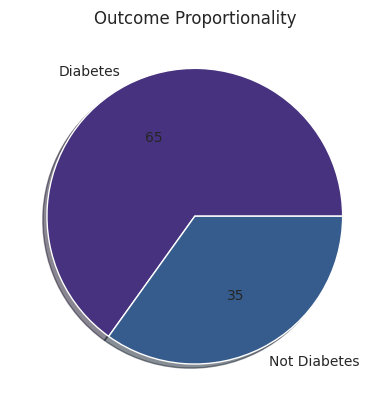

In [53]:
# Check outcome proportionality
plt.pie(df.Outcome.value_counts(),
        labels= ['Diabetes', 'Not Diabetes'],
        autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

In [54]:
# separate array into input and output components
X = df.drop(columns =['Outcome'])
Y = df.Outcome

Dataset Normalization

In [55]:
# Normalization of dataset
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
rescaledX[:5]

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

Dataset Standardization

In [56]:
# Standardization of dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
rescaledX[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

Exploratory Data Analysis 1: Univariate Analysis

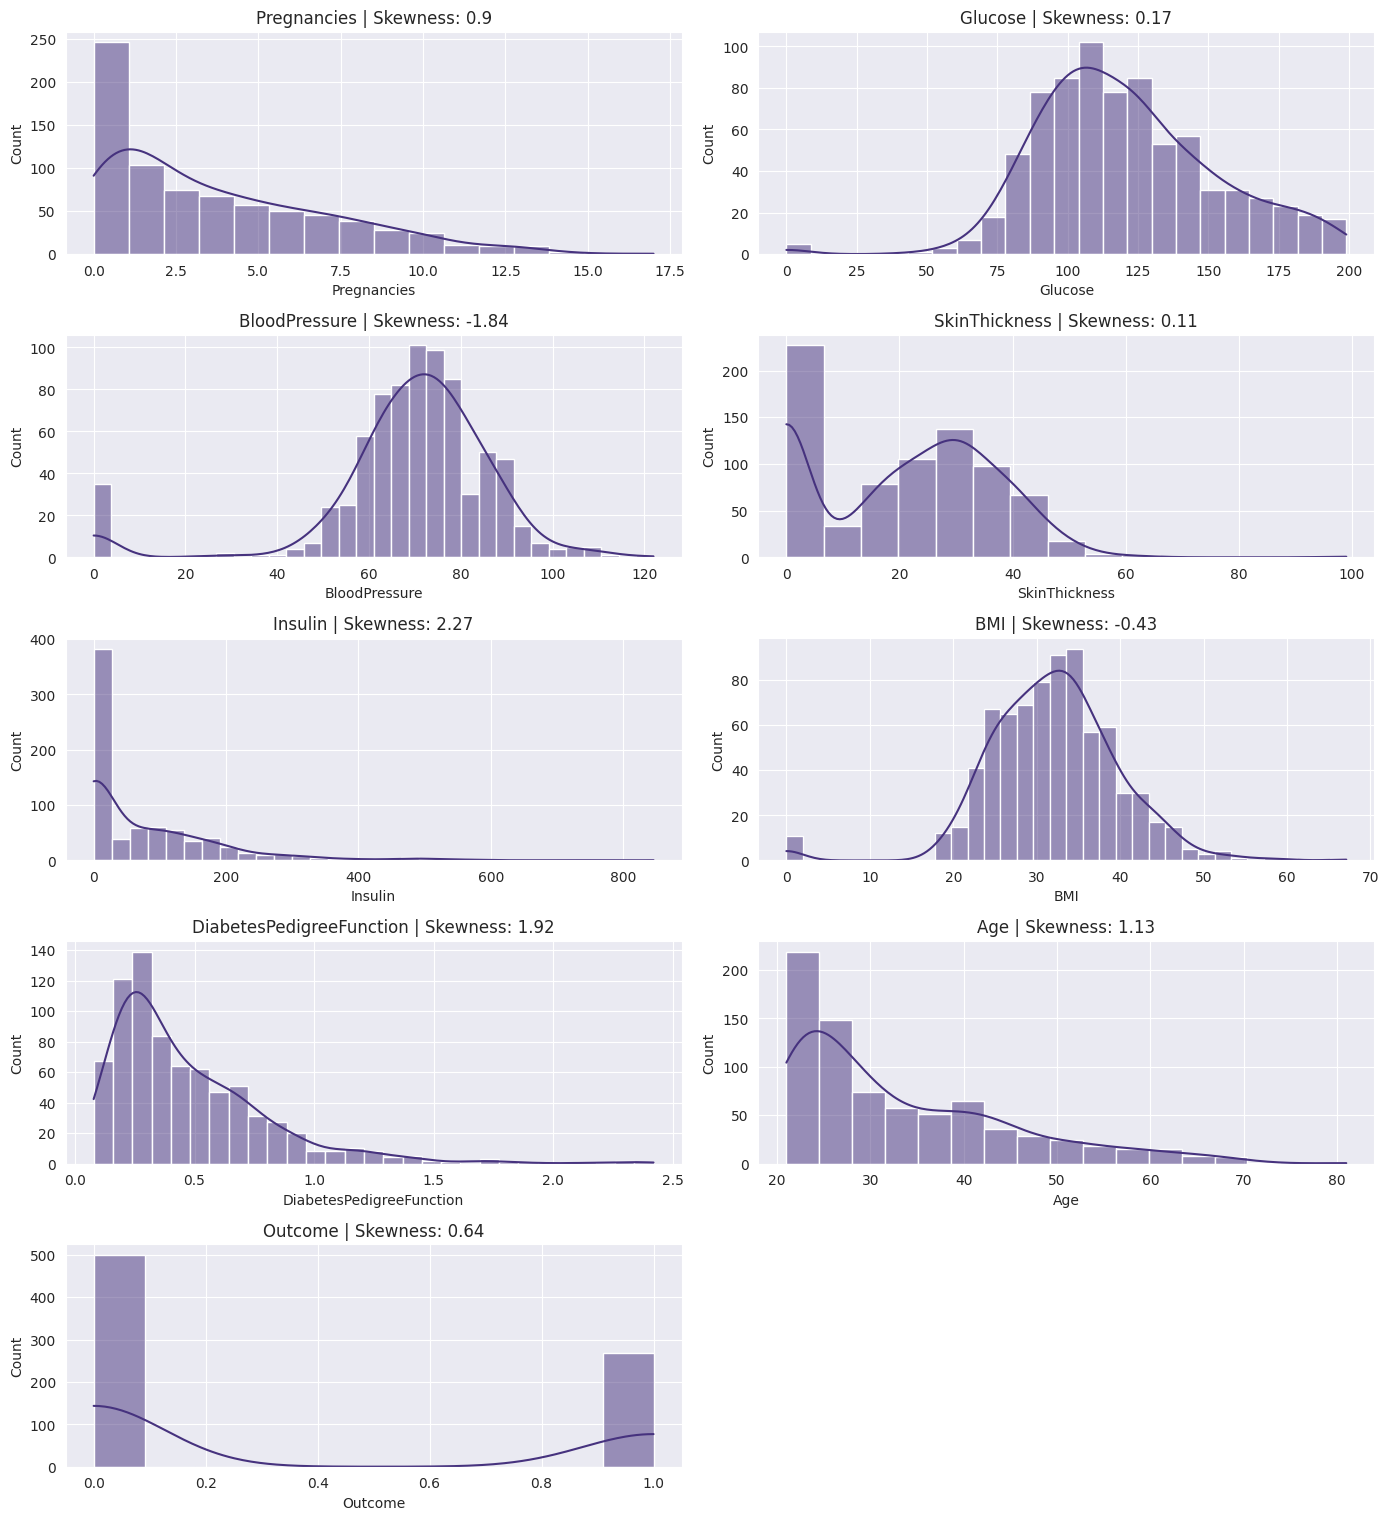

In [57]:
# EDA1_Univariate Analysis_Kernel Density Plots
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Exploratory Data Analysis 2: Bivariate Analysis

<Figure size 1000x600 with 0 Axes>

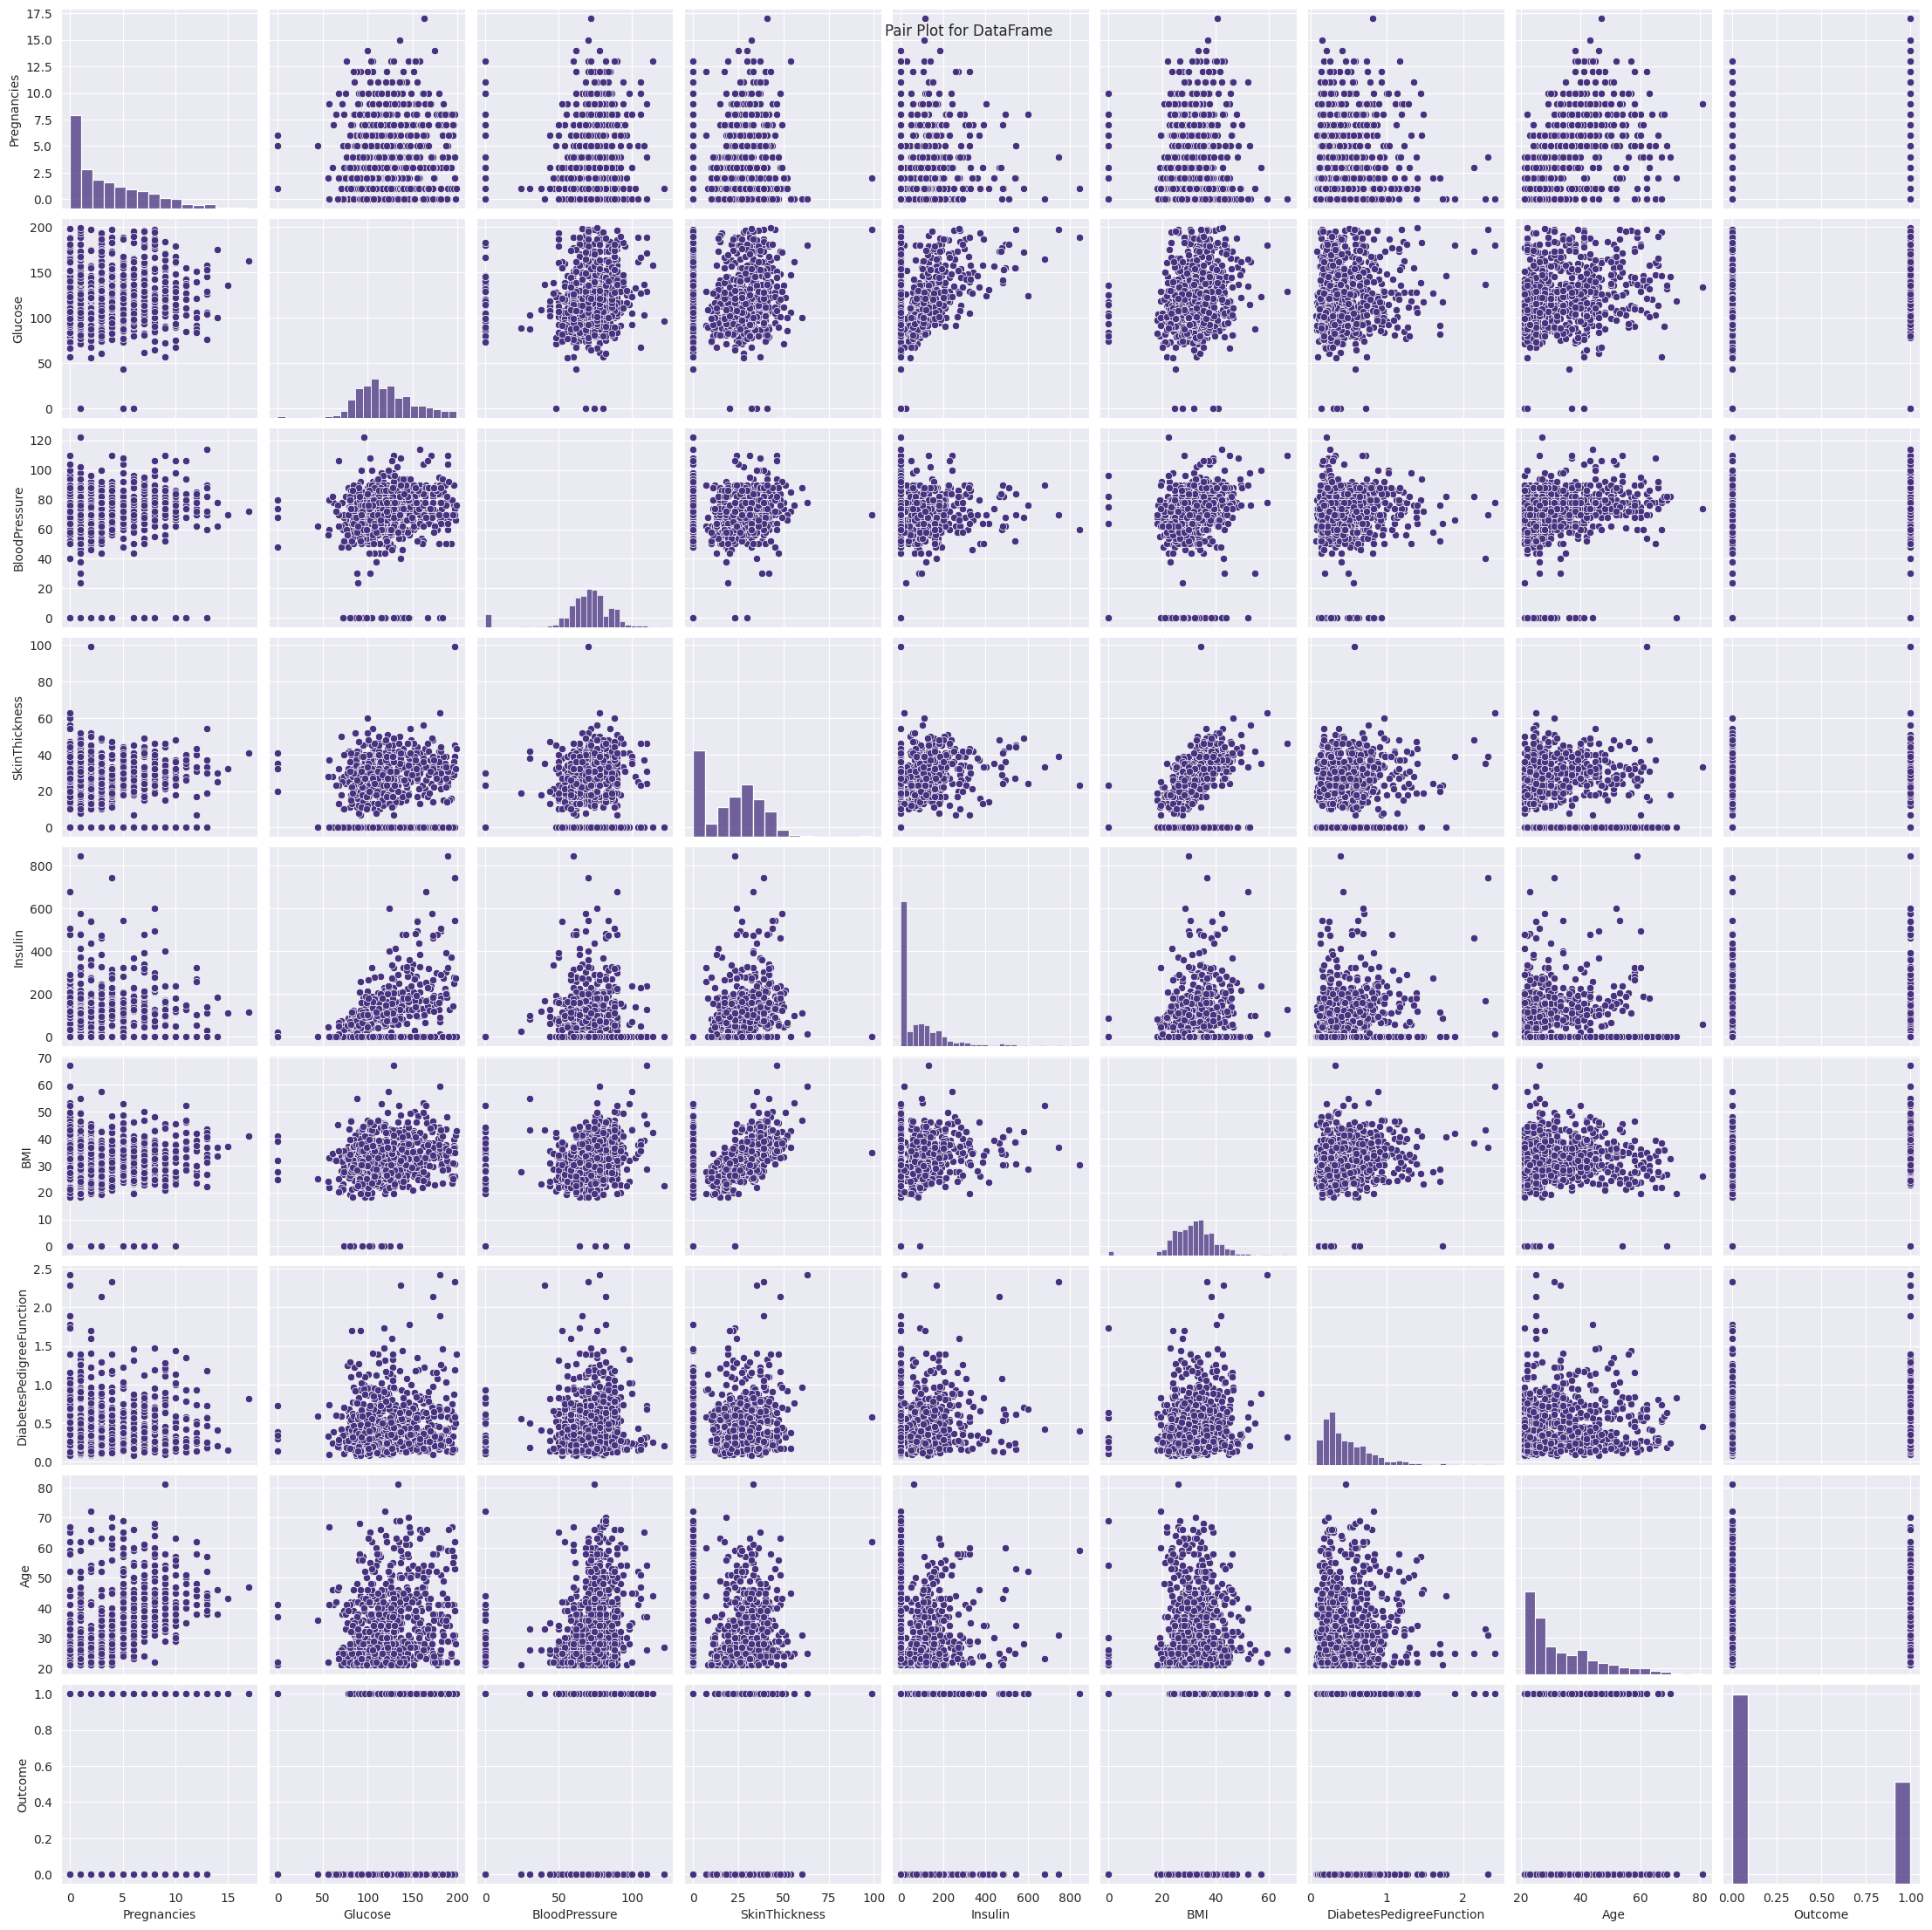

In [58]:
# EDA2_Bivariate Analysis_Pair Plot
# Set the color palette
sns.set_palette("viridis")

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

Exploratory Data Analysis 3: Multivariate Analysis

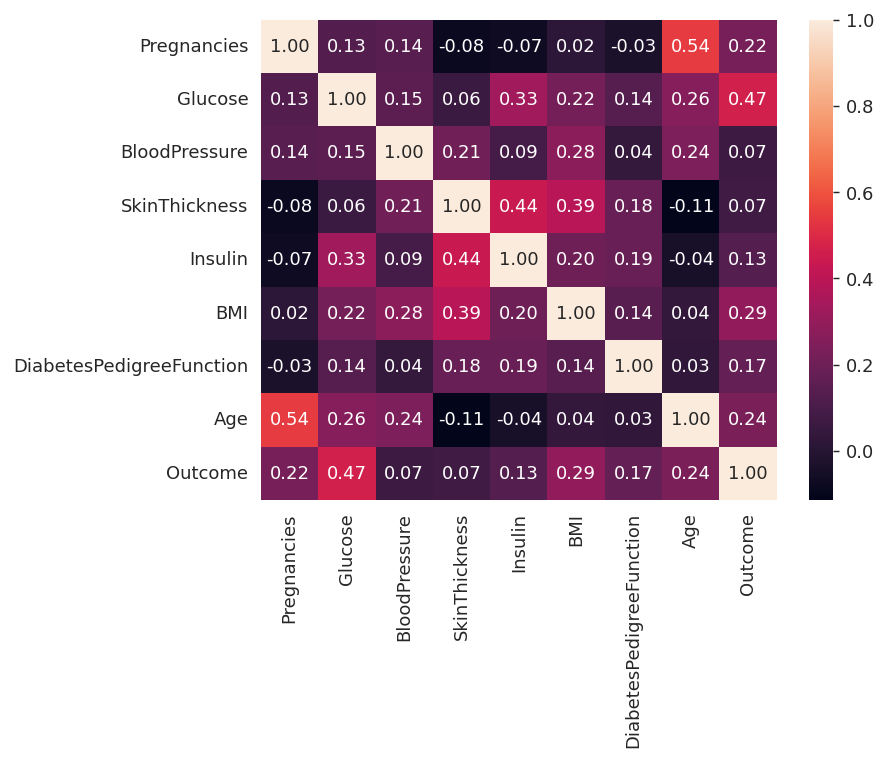

In [59]:
# EDA3_Multivariate Analysis_Correlation Matrix
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

Model 1: K-Nearest Neighbors

Accuracy: 74.8918 %
Precision: 0.5270
Recall: 0.6290
F1 Score: 0.5735


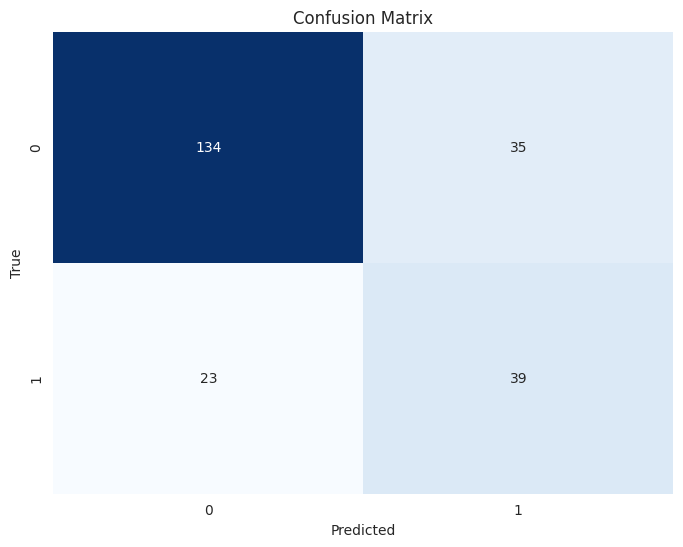

In [60]:
# Model1_KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

M = df['Outcome']
N = df.drop('Outcome',axis=1)

# splitting the data into training, 70% and testing sets, 30%
N_train,N_test,M_train,M_test = train_test_split(N,M,test_size = 0.3, random_state=0)

# creating the classifier
clf = KNeighborsClassifier()
clf.fit(N_train,M_train)
pred_KNN = clf.predict(N_test)

# Print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(pred_KNN, M_test)
precision = precision_score(pred_KNN, M_test)
recall = recall_score(pred_KNN, M_test)
f1 = f1_score(pred_KNN, M_test)

print('Accuracy: {:.4f}'.format(accuracy*100),"%")
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1))

# Confusion matrix
cm = confusion_matrix(pred_KNN, M_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Model 2: Random Forest

Accuracy: 76.1905 %
Precision: 0.6712
Recall: 0.6125
F1 Score: 0.6405


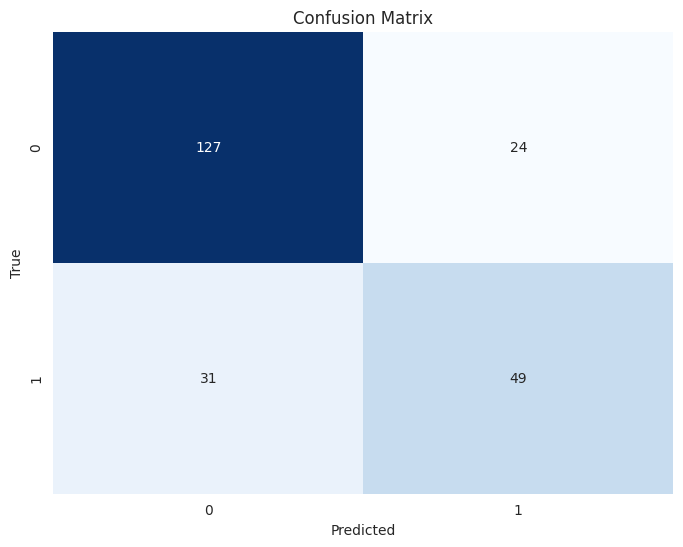

In [66]:
# Model2_KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

# splitting the data into training, 70% and testing sets, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# grid of parameters
param_grid = {'n_estimators': [400, 500, 600],
              'max_leaf_nodes': [14, 15, 16]}

# creating the classifier
random_forest = RandomForestClassifier(n_jobs=-1)


grid_search_rf = GridSearchCV(random_forest,
                              param_grid=param_grid,
                              cv=3,
                              scoring='recall',
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

# grid_search_rf model and X_test, y_test datasets
y_pred = grid_search_rf.predict(X_test)

# Print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.4f}'.format(accuracy*100),"%")
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()